# Kelompok 2
1. Akmal Zulkifli (2101310)
2. Ananda Myzza Marhelio (2100702)
3. Mochamad Khaairi (2106416)
4. Muhammad Izzatul Haq (1904618)
5. Thariq Hafizhuddin (1904601)

# Spesifikasi Soal
Terdapat dua dataset yaitu dataset train (untuk membuat model) dan dataset class (untuk prediksi). Pada dataset train terdapat 14 atribut yang berbeda dan dataset class memiliki 13 atribut yang berbeda, kedua dataset tersebut memiliki atribut yang sama kecuali pada dataset class tidak terdapat atribut returnShipment (atribut yang nantinya harus diprediksi)

task: memprediksi apakah setelah membeli customer akan mengembalikan barang

# PraProses Data Train

### Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv("C:/Users/MoKha/orders_train.txt", sep=';')

### Melihat spesifik data

In [3]:
df_raw.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,2012-04-01,2012-04-03,186,m,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0
1,2,2012-04-01,2012-04-03,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
2,3,2012-04-01,2012-04-03,71,9+,curry,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
3,4,2012-04-02,?,22,m,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0
4,5,2012-04-02,1990-12-31,151,39,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   orderItemID     481092 non-null  int64  
 1   orderDate       481092 non-null  object 
 2   deliveryDate    481092 non-null  object 
 3   itemID          481092 non-null  int64  
 4   size            481092 non-null  object 
 5   color           481092 non-null  object 
 6   manufacturerID  481092 non-null  int64  
 7   price           481092 non-null  float64
 8   customerID      481092 non-null  int64  
 9   salutation      481092 non-null  object 
 10  dateOfBirth     481092 non-null  object 
 11  state           481092 non-null  object 
 12  creationDate    481092 non-null  object 
 13  returnShipment  481092 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 51.4+ MB


### Isi tangal yang kosong dengan rata-rata range orderDate hingga deliveryDate

In [5]:
#filter data tanggal yang noise yaitu dengan mengambil data yang tidak noise saja 
#(data yang entrynya bukan '?' dan deliverydate nya lebih dari orderdatenya)
#karena tidak mungkin waktu pengiriman lebih dulu daripada waktu pemesanan
df_temp = df_raw[df_raw.deliveryDate != '?']
df_temp = df_temp[df_raw.deliveryDate > df_raw.orderDate.min()]

C:\Users\MoKha\AppData\Local\Temp\ipykernel_13000\2811334917.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[df_raw.deliveryDate > df_raw.orderDate.min()]


In [6]:
#ubah tipe data menjadi datetime
df_temp['deliveryDate'] = df_temp['deliveryDate'].astype('datetime64');
df_temp['orderDate'] = df_temp['orderDate'].astype('datetime64');

In [7]:
#cari range dari orderDate sampai deliverDate (range merupakan waktu pengiriman barang)
order_delivery_date = df_temp['deliveryDate'].dt.to_period('D').view('int64') - df_temp['orderDate'].dt.to_period('D').view('int64')

order_delivery_date.head()

0    2
1    2
2    2
7    1
8    1
dtype: int64

In [8]:
#cari rata-rata range untuk nantinya mengganti deliverydate yang masih salah dan masih kosong
delivery_mean = int(order_delivery_date.describe()['mean'])
delivery_mean

10

Mean yang didapat adalah 10, maka data date untuk deliveryDate diisi 10 hari dari orderDate

### Pengisian deliveryDate yang kosong dan tidak sesuai

In [9]:
from datetime import datetime, timedelta, date

In [10]:
#ubah tipe data menjadi datetime
df_raw['orderDate'] = df_raw['orderDate'].astype('datetime64');

In [11]:
# Isi entry deliveryDate bervalue '?'
df_raw['deliveryDate'] = np.where(df_raw['deliveryDate'] == '?', \
                        (df_raw['orderDate'] + timedelta(days=delivery_mean)).astype('str'), \
                        df_raw['deliveryDate'])

In [12]:
# Isi entry deliveryDate bervalue date kurang dari waktu pengiriman tertua
df_raw['deliveryDate'] = np.where(df_raw['deliveryDate'] < df_raw.orderDate.min().strftime('%Y-%m-%d'), \
                        (df_raw['orderDate'] + timedelta(days=delivery_mean)).astype('str'), \
                        df_raw['deliveryDate'])

In [13]:
df_raw.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,2012-04-01,2012-04-03,186,m,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0
1,2,2012-04-01,2012-04-03,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
2,3,2012-04-01,2012-04-03,71,9+,curry,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
3,4,2012-04-02,2012-04-12,22,m,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0
4,5,2012-04-02,2012-04-12,151,39,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0


In [14]:
#ubah tipe data menjadi datetime
df_raw['deliveryDate'] = df_raw['deliveryDate'].astype('datetime64');

### Fitur Waktu Pengiriman (dalam hari)

fitur deliveryDate dan orderDate dihitung rentang waktunya dan diinput pada column baru shippingTime

In [15]:
#mencari waktu pengiriman yaitu dengan cara mengurangi tanggal pengiriman (dalam integer) dengan tanggal pemesanan (dalam integer)
df_raw['shippingTime'] = df_raw['deliveryDate'].dt.to_period('D').view('int64') - df_raw['orderDate'].dt.to_period('D').view('int64')

In [16]:
df_raw.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment,shippingTime
0,1,2012-04-01,2012-04-03,186,m,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0,2
1,2,2012-04-01,2012-04-03,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,2
2,3,2012-04-01,2012-04-03,71,9+,curry,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,2
3,4,2012-04-02,2012-04-12,22,m,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0,10
4,5,2012-04-02,2012-04-12,151,39,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0,10


### Convert Sizes
Didapatkan bahwa format untuk size bercampur antar standar europe, uk, dan internasional sehingga perlu disamakan yaitu menjadi standar internasional

In [17]:
#Mengubah format standar internasional pada dataset menjadi standar europe
df_raw["size"] = df_raw["size"].replace({"xxs": "32", "xs": "34", "s": "36", "m": "38", "l": "40",
                                         "xl": "42", "xxl": "44", "xxxl": "46", "S": "36", "L": "40",
                                         "XXL": "44", "M": "38", "XL": "42", "XXXL": "46", "XS": "34", "XXS": "32"})

In [18]:
#Mengubah entry yang unsized menjadi '0' agar dapat diconvert ke integer nantinya
df_raw["size"] = df_raw["size"].replace("unsized", "0")

In [19]:
#Menghilangkan tanda '+' pada data
df_raw['size'] = df_raw['size'].str.replace('+', '', regex=True)

In [20]:
#Ubah tipe data menjadi integer agar dapat menggunakan fitur between
df_raw['size'] = df_raw['size'].astype('int64')

In [21]:
#Melihat banyak data outlier (yaitu yang sizenya lebih dari 50)
display(len(df_raw[df_raw["size"] > 50]))

2415

In [22]:
#Menyamakan size agar mudah dalam penukaran ke standar internasional
df_raw['size'] = np.where(df_raw['size'].between(1,3), 31, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(4,5), 33, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(6,7), 35, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(8,9), 37, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(10,11), 39, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(12,13), 41, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(14,15), 43, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(16,17), 45, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(18,19), 47, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(20,21), 49, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(22,26), 51, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(27,31), 31, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(32,33), 33, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(34,35), 35, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(36,37), 37, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(38,39), 39, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(40,41), 41, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(42,43), 43, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(44,45), 45, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(46,47), 47, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(48,49), 49, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'].between(50,51), 51, df_raw['size'])
df_raw['size'] = np.where(df_raw['size'] > 50, 51, df_raw['size'])

In [23]:
#Mengubah tipe data menjadi string / object
df_raw['size'] = df_raw['size'].astype('str')

In [24]:
#Mengubah format standar europe menjadi standar international
df_raw["size"] = df_raw["size"].replace({"31": "XXXS", "33": "XXS", "35": "XS", "37": "S", "39": "M", 
                                         "41": "L", "43": "XL", "45": "XXL", "47": "XXXL", "49": "XXXXL", 
                                         "51": "XXXXXL", "0": "unsized"})

Cek data

In [25]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   orderItemID     481092 non-null  int64         
 1   orderDate       481092 non-null  datetime64[ns]
 2   deliveryDate    481092 non-null  datetime64[ns]
 3   itemID          481092 non-null  int64         
 4   size            481092 non-null  object        
 5   color           481092 non-null  object        
 6   manufacturerID  481092 non-null  int64         
 7   price           481092 non-null  float64       
 8   customerID      481092 non-null  int64         
 9   salutation      481092 non-null  object        
 10  dateOfBirth     481092 non-null  object        
 11  state           481092 non-null  object        
 12  creationDate    481092 non-null  object        
 13  returnShipment  481092 non-null  int64         
 14  shippingTime    481092 non-null  int

In [26]:
df_raw.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment,shippingTime
0,1,2012-04-01,2012-04-03,186,M,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0,2
1,2,2012-04-01,2012-04-03,71,S,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,2
2,3,2012-04-01,2012-04-03,71,S,curry,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,2
3,4,2012-04-02,2012-04-12,22,M,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0,10
4,5,2012-04-02,2012-04-12,151,M,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0,10


### Convert date of birth menjadi age (dalam tahun)
dihitung dari rentang tanggal lahir dengan waktu pembuatan akun lalu diinput pada column baru yaitu age

In [27]:
#Ganti tahun yang kemungkinan salah input (typo)
df_raw['dateOfBirth'] = df_raw['dateOfBirth'].str.replace('1655','1965')

In [28]:
#Ubah data yang input data dateOfBirthnya "?" menjadi none
df_raw["dateOfBirth"] = df_raw["dateOfBirth"].replace("?", None)

In [29]:
#convert atribut dateOfBirth dan creationDate menjadi datetime
df_raw['dateOfBirth'] = pd.to_datetime(df_raw['dateOfBirth'])
df_raw['creationDate'] = pd.to_datetime(df_raw['creationDate'])

In [30]:
df_raw.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment,shippingTime
0,1,2012-04-01,2012-04-03,186,M,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0,2
1,2,2012-04-01,2012-04-03,71,S,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,2
2,3,2012-04-01,2012-04-03,71,S,curry,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,2
3,4,2012-04-02,2012-04-12,22,M,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0,10
4,5,2012-04-02,2012-04-12,151,M,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0,10


In [31]:
#Cari usia berdasarkan dateOfBirth (tanggal lahir) dengan creationDate (tanggal pembuatan akun)
df_raw["age"] = (df_raw['creationDate'].dt.year - df_raw['dateOfBirth'].dt.year) - ((df_raw['creationDate'].dt.month - df_raw['dateOfBirth'].dt.month) < 0)

In [32]:
#isi data age yang nan dengan rata-rata age
df_raw["age"] = df_raw["age"].fillna(df_raw["age"].mean())

cek data

In [33]:
df_raw["age"].describe()

count    481092.000000
mean         47.200609
std          10.408595
min          -2.000000
25%          42.000000
50%          47.200609
75%          51.000000
max         112.000000
Name: age, dtype: float64

### Ubah nama warna dengan entry "?" pada atribut color

In [34]:
#cek berapa banyak data yang "?"
df_raw["color"].value_counts()["?"]

143

In [35]:
#Ubah data yang yang input datanya "?" pada atribut color menjadi none
df_raw["color"] = df_raw["color"].replace("?", None)

### Ubah Warna Ke Warna Dasarnya

In [36]:
#mengubah tiap warna ke warna dasarnya dengan melakukan pengecekan manual ada warna apa saja pada entry data
#lalu mencari tiap warna yang ada pada mesin pencarian dan menggantinya ke warna dasarnya / warna yang mendekati
#hal ini dilakukan karena terdapat warna yang tidak ada pada data train tetapi terdapat pada data class
df_raw["color"] = df_raw["color"].replace({"dark denim":"blue","dark navy":"blue", "ash":"grey", "bordeaux":"red", 
                                           "mahagoni":"red", "gold":"yellow", "dark oliv":"green", "striped":"multi", 
                                           "anthracite":"grey", "antique pink":"red", "floral":"multi", "baltic blue":"blue", 
                                           "nature":"green", "ancient":"brown", "curry":"yellow", "turquoise":"blue", 
                                           "navy":"blue", "aubergine":"purple", "mocca":"brown", "blau":"blue", 
                                           "basalt":"grey", "azure":"blue", "coral":"yellow", "pallid":"multi", "petrol":"blue", 
                                           "silver":"grey", "habana":"brown", "darkblue":"blue", "beige":"yellow", "mint":"green", 
                                           "khaki":"brown", "hibiscus":"red", "orange":"red", "almond":"brown","berry":"purple", 
                                           "ocher":"yellow", "avocado":"green", "magenta":"purple", "olive":"green", 
                                           "denim":"blue", "pink":"red", "stained":"brown", "kanel":"brown", 
                                           "jade":"green", "aquamarine":"blue", "aqua":"blue", "ecru":"grey", 
                                           "iron":"grey", "fuchsia":"purple", "ingwer":"brown", "cognac":"brown", 
                                           "terracotta":"brown", "apricot":"yellow", "graphite":"grey", "crimson":"red", 
                                           "lemon":"yellow", "oliv":"green", "leopard":"yellow", "amethyst":"purple", 
                                           "aviator":"blue", "bronze":"brown", "brwon":"brown", "caramel":"brown", 
                                           "champagner":"yellow", "cobalt blue":"blue", "copper coin":"brown", 
                                           "cortina mocca":"brown", "creme":"yellow", "curled":"brown", "currant purple":"purple", 
                                           "dark garnet":"purple", "dark grey":"grey", "ebony":"black", "ivory":"white", 
                                           "mango":"yellow", "opal":"multi", "perlmutt":"multi", "vanille":"white"})

## EDA (Exploratory Data Analysis)

[Text(0.5, 1.0, 'Jumlah Pengembalian Berdasarkan Panggilan')]

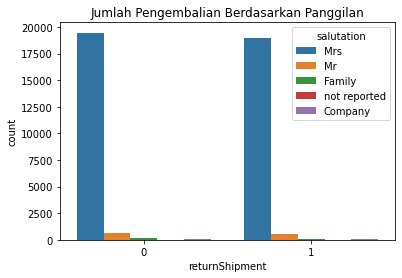

In [38]:
sns.countplot( x="returnShipment", hue="salutation", data=df_raw.head(40000)).set(title="Jumlah Pengembalian Berdasarkan Panggilan")

Dapat dilihat bahwa pengembalian barang didominasi oleh perempuan (Mrs) tetapi bila dilihat dari jumlah data Mrs hal tersebut
sangat memungkinkan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Baden-Wuerttemberg'),
  Text(1, 0, 'Saxony'),
  Text(2, 0, 'Rhineland-Palatinate'),
  Text(3, 0, 'North Rhine-Westphalia'),
  Text(4, 0, 'Berlin'),
  Text(5, 0, 'Bavaria'),
  Text(6, 0, 'Hesse'),
  Text(7, 0, 'Bremen'),
  Text(8, 0, 'Schleswig-Holstein'),
  Text(9, 0, 'Brandenburg'),
  Text(10, 0, 'Hamburg'),
  Text(11, 0, 'Lower Saxony'),
  Text(12, 0, 'Saxony-Anhalt'),
  Text(13, 0, 'Saarland'),
  Text(14, 0, 'Thuringia'),
  Text(15, 0, 'Mecklenburg-Western Pomerania')])

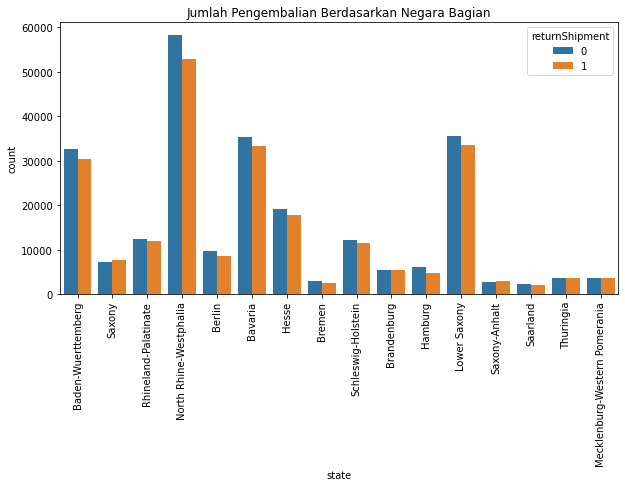

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(ax=ax, x="state", hue="returnShipment", data=df_raw).set(title="Jumlah Pengembalian Berdasarkan Negara Bagian")
plt.xticks(rotation=90)

Dapat dilihat untuk data pengembalian barang dengan tidak mengembalikan hampir seimbang untuk semua negara bagian

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Baden-Wuerttemberg'),
  Text(1, 0, 'Saxony'),
  Text(2, 0, 'Rhineland-Palatinate'),
  Text(3, 0, 'North Rhine-Westphalia'),
  Text(4, 0, 'Berlin'),
  Text(5, 0, 'Bavaria'),
  Text(6, 0, 'Hesse'),
  Text(7, 0, 'Bremen'),
  Text(8, 0, 'Schleswig-Holstein'),
  Text(9, 0, 'Brandenburg'),
  Text(10, 0, 'Hamburg'),
  Text(11, 0, 'Lower Saxony'),
  Text(12, 0, 'Saxony-Anhalt'),
  Text(13, 0, 'Saarland'),
  Text(14, 0, 'Thuringia'),
  Text(15, 0, 'Mecklenburg-Western Pomerania')])

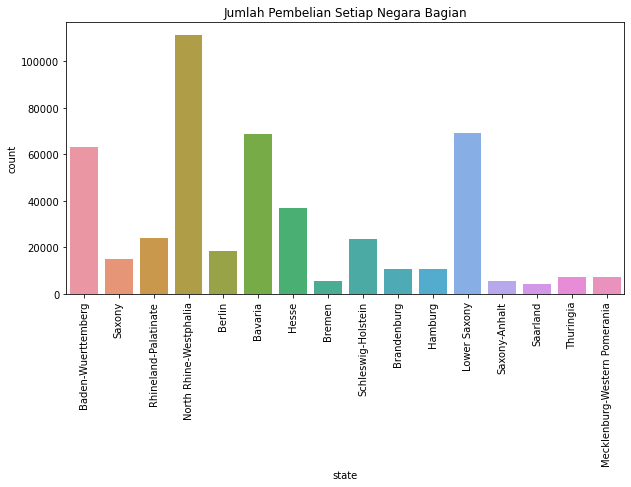

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(ax=ax, x="state", data=df_raw).set(title="Jumlah Pembelian Setiap Negara Bagian")
plt.xticks(rotation=90)

[Text(0.5, 1.0, 'Jumlah Pengembalian Berdasarkan Umur')]

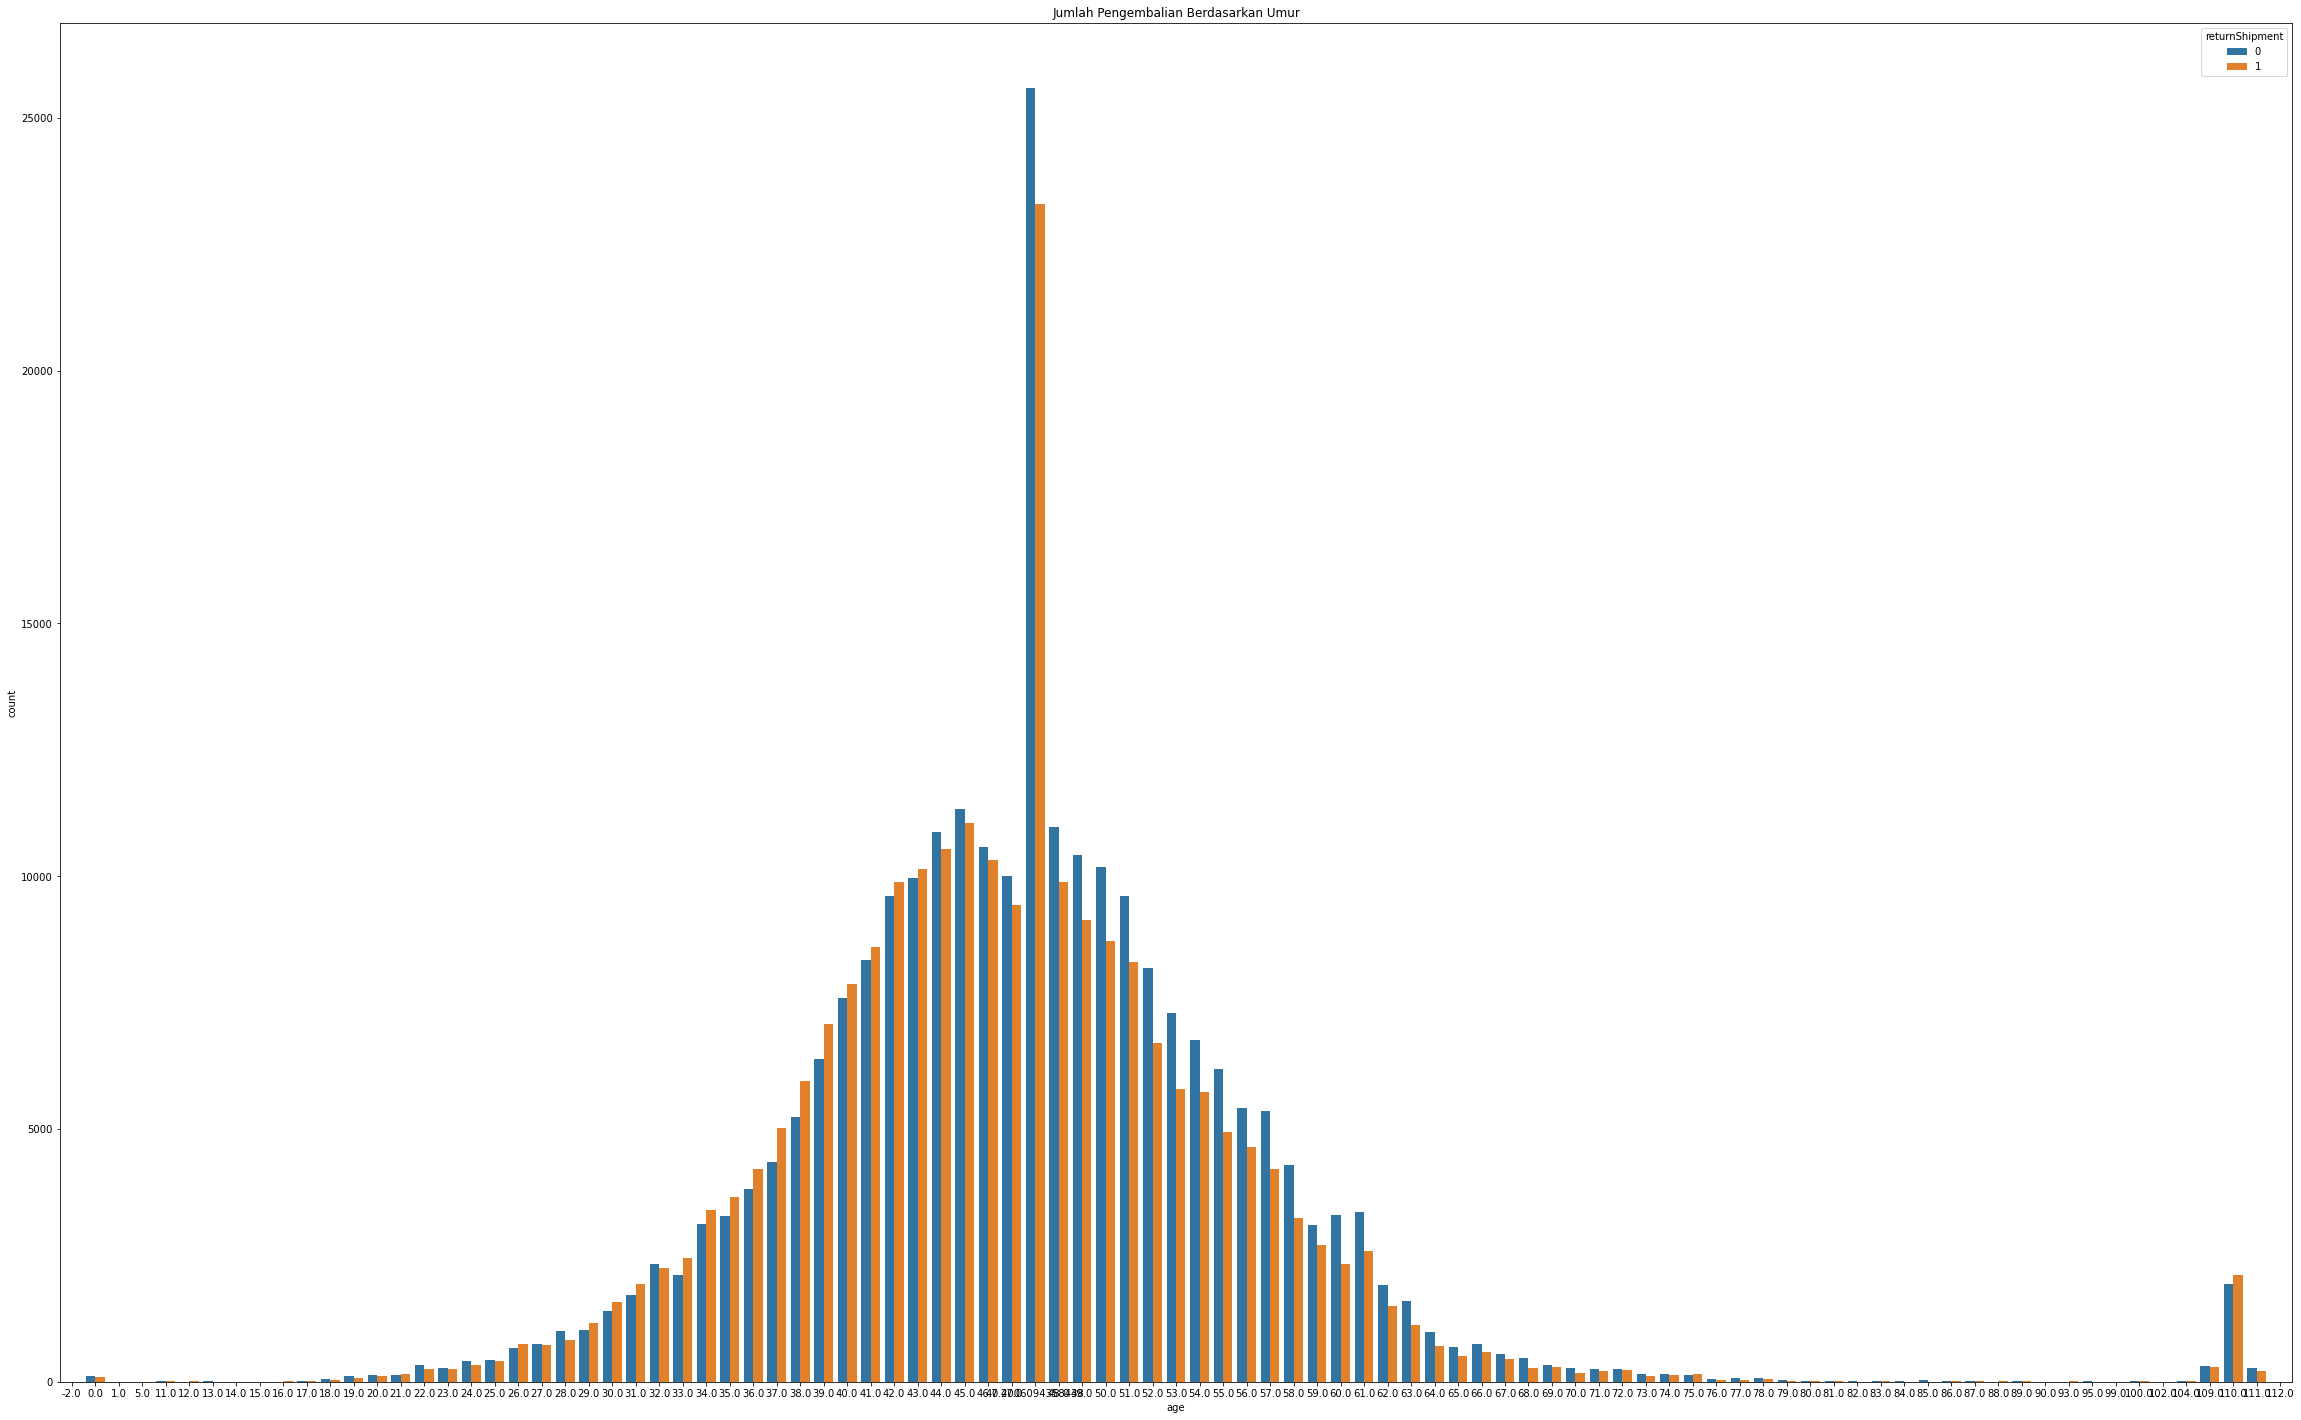

In [41]:
fig, ax = plt.subplots(figsize=(40, 25))
sns.countplot(ax=ax, x="age", hue="returnShipment", data=df_raw).set(title="Jumlah Pengembalian Berdasarkan Umur")

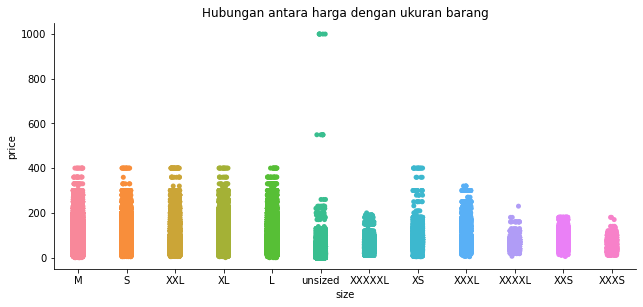

In [42]:
c = sns.catplot(x="size", y="price", data=df_raw).set(title="Hubungan antara harga dengan ukuran barang")
c.fig.set_size_inches(10,4)

Dapat dilihat ukuran barang cukup berbanding lurus dengan harga (barang dengan ukuran kecil relative berharga lebih murah
daripada barang dengan ukuran yang lebih besar)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'blue'),
  Text(1, 0, 'yellow'),
  Text(2, 0, 'green'),
  Text(3, 0, 'black'),
  Text(4, 0, 'brown'),
  Text(5, 0, 'red'),
  Text(6, 0, 'grey'),
  Text(7, 0, 'purple'),
  Text(8, 0, 'white'),
  Text(9, 0, 'multi')])

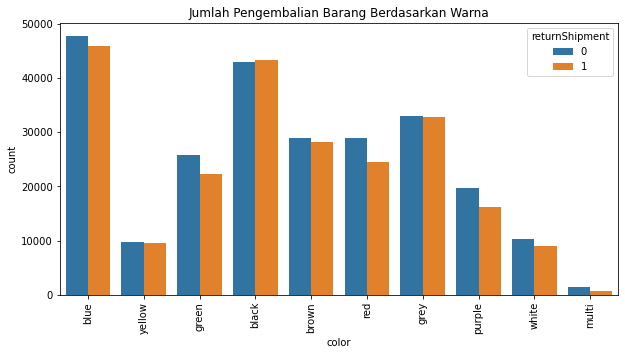

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(ax=ax, x="color", hue="returnShipment", data=df_raw).set(title="Jumlah Pengembalian Barang Berdasarkan Warna")
plt.xticks(rotation=90)

Dapat dilihat bahwa barang dengan warna dasar biru paling banyak dalam jumlah pengembalian

# Feature Engineering

### Membuat Fitur Account Age (dalam hari)
account age dihitung dari rentang tanggal pembuatan akun hingga tanggal pengiriman barang

In [44]:
#Hitung account age
df_raw['accountAge'] = df_raw['deliveryDate'].dt.to_period('D').view('int64') - df_raw['creationDate'].dt.to_period('D').view('int64')

In [45]:
df_raw.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment,shippingTime,age,accountAge
0,1,2012-04-01,2012-04-03,186,M,blue,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0,2,46.0,344
1,2,2012-04-01,2012-04-03,71,S,yellow,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,2,46.0,344
2,3,2012-04-01,2012-04-03,71,S,yellow,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,2,46.0,344
3,4,2012-04-02,2012-04-12,22,M,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0,10,52.0,99
4,5,2012-04-02,2012-04-12,151,M,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0,10,46.0,421


### Ambil Bulan Pembelian Barang

In [46]:
df_raw["orderMonth"] = df_raw['orderDate'].dt.month

In [47]:
df_raw.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment,shippingTime,age,accountAge,orderMonth
0,1,2012-04-01,2012-04-03,186,M,blue,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0,2,46.0,344,4
1,2,2012-04-01,2012-04-03,71,S,yellow,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,2,46.0,344,4
2,3,2012-04-01,2012-04-03,71,S,yellow,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,2,46.0,344,4
3,4,2012-04-02,2012-04-12,22,M,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0,10,52.0,99,4
4,5,2012-04-02,2012-04-12,151,M,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0,10,46.0,421,4


### Mencari Delivery Ratio Untuk Tiap itemID

In [48]:
#buat dataframe baru berisi itemID dan rata-rata shippingTime untuk itemID tersebut
avg_delivery_time = pd.DataFrame(df_raw.groupby(['itemID'])['shippingTime'].mean())

In [49]:
#ubah nama kolom menjadi avgShippingTime
avg_delivery_time = avg_delivery_time.rename(columns = {'shippingTime': "AvgShippingTime"})
#bulatkan hasil rata-rata shippingTime menjadi 2 angka di belakang koma
avg_delivery_time['AvgShippingTime'] = round(avg_delivery_time['AvgShippingTime'], 2)

In [50]:
avg_delivery_time.head()

,AvgShippingTime
itemID,
1,5.40
2,5.50
3,5.77
4,4.48
5,6.00


In [51]:
#gabungkan dataframe tadi ke dataframe utama berdasarkan itemIDnya
df_raw = pd.merge(df_raw, avg_delivery_time, on = 'itemID', how = 'left')

In [52]:
#mencari ratio yaitu membagi shippingTime dengan rata-rata shippingTime nya
df_raw["deliveryRatio"] = df_raw["shippingTime"] / df_raw["AvgShippingTime"]

### Membuat Poverty Ranking State

In [53]:
#mencari poverty rank untuk tiap state dan membuatnya menjadi atribut baru
df_raw["povertyRank"] = df_raw["state"].replace({"North Rhine-Westphalia": 16, "Bavaria": 15, "Baden-Wuerttemberg": 14, "Lower Saxony": 13,
                                              "Hesse": 12, "Rhineland-Palatinate": 11, "Berlin": 10, "Saxony": 9, "Hamburg": 8,
                                              "Schleswig-Holstein": 7, "Brandenburg": 6, "Thuringia": 5, "Saxony-Anhalt": 4,
                                              "Mecklenburg-Western Pomerania": 3, "Saarland": 2, "Bremen": 1})

### Mencari Rata-Rata Harga Untuk Tiap itemID

In [54]:
#buat dataframe baru berisi itemID dan rata-rata harga untuk itemID tersebut
avg_price = pd.DataFrame(df_raw.groupby(['itemID'])['price'].mean())

In [55]:
#ubah nama kolom menjadi AverageItemPrice
avg_price = avg_price.rename(columns = {'price': "AverageItemPrice"})
#bulatkan hasil rata-rata harga menjadi 2 angka di belakang koma
avg_price['AverageItemPrice'] = round(avg_price['AverageItemPrice'], 2)

In [56]:
avg_price.head()

,AverageItemPrice
itemID,
1,111.65
2,30.45
3,23.10
4,89.85
5,52.66


In [57]:
#gabungkan dataframe tadi ke dataframe utama berdasarkan itemIDnya
df_raw = pd.merge(df_raw, avg_price, on = 'itemID', how = 'left')

### Mencari Persentase Pengembalian Barang Berdasarkan ManufactureID

In [58]:
#membuat dataframe baru berisi manufactureID dan jumlah barang yang dikebalikan dan tidak dari manufactureID tersebut
manufacturer_return = pd.DataFrame(pd.crosstab(df_raw['manufacturerID'], df_raw['returnShipment']))
#jadikan hasil crosstab menjadi column dengan nama noReturn (untuk 0) dan return (untuk 1)
manufacturer_return.columns = ['noReturn', 'return']
manufacturer_return.head()

,noReturn,return
manufacturerID,,
1,17250,18582
2,1890,1709
3,40007,25498
4,2243,2146
5,20842,17920


In [59]:
#mencari total barang yang terjual yaitu total dari barang yang dikembalikan dan tidak
manufacturer_return['totalSales'] = manufacturer_return['noReturn'] + manufacturer_return['return']

In [60]:
#mencari persentase barang yang tidak dikembalikan (dibulatkan menjadi 2 angka di belakang koma)
manufacturer_return['noReturnPercenMan'] = round(manufacturer_return['noReturn'] / manufacturer_return['totalSales'], 2)
#mencari persentase barang yang dikembalikan (dibulatkan menjadi 2 angka di belakang koma)
manufacturer_return['returnPercenMan'] = round(manufacturer_return['return'] / manufacturer_return['totalSales'], 2)

In [61]:
#hapus column yang tidak diperlukan (hanya diperlukan persentasenya saja)
manufacturer_return = manufacturer_return.drop(["noReturn", "return", "totalSales"], axis = 1)
manufacturer_return.head()

,noReturnPercenMan,returnPercenMan
manufacturerID,,
1,0.48,0.52
2,0.53,0.47
3,0.61,0.39
4,0.51,0.49
5,0.54,0.46


In [62]:
#gabungkan dataframe tadi ke dataframe utama
df_raw = pd.merge(df_raw, manufacturer_return, on = 'manufacturerID', how = 'left')

### Mencari Rate Pengembalian Barang Berdasarkan itemID

In [63]:
#membuat dataframe baru berisi itemID dan jumlah barang yang dikebalikan dan tidak dari itemID tersebut
item_return = pd.DataFrame(pd.crosstab(df_raw['itemID'], df_raw['returnShipment']))
#jadikan hasil crosstab menjadi column dengan nama noReturn (untuk 0) dan return (untuk 1)
item_return.columns = ['noReturn', 'return']
item_return.head()

,noReturn,return
itemID,,
1,335,431
2,235,154
3,355,163
4,114,198
5,417,413


In [64]:
#mencari total barang yang terjual yaitu total dari barang yang dikembalikan dan tidak
item_return['totalSales'] = item_return['noReturn'] + item_return['return']

In [65]:
#mencari persentase barang yang tidak dikembalikan (dibulatkan menjadi 2 angka di belakang koma)
item_return['noReturnPercenItem'] = round(item_return['noReturn'] / item_return['totalSales'], 2)
#mencari persentase barang yang dikembalikan (dibulatkan menjadi 2 angka di belakang koma)
item_return['returnPercenItem'] = round(item_return['return'] / item_return['totalSales'], 2)

In [66]:
#hapus column yang tidak diperlukan (hanya diperlukan persentasenya saja)
item_return = item_return.drop(["noReturn", "return", "totalSales"], axis = 1)
item_return.head()

,noReturnPercenItem,returnPercenItem
itemID,,
1,0.44,0.56
2,0.60,0.40
3,0.69,0.31
4,0.37,0.63
5,0.50,0.50


In [67]:
#gabungkan dataframe tadi ke dataframe utama
df_raw = pd.merge(df_raw, item_return, on = 'itemID', how = 'left')

### Mencari Rate Pengembalian Barang Berdasarkan state

In [68]:
#membuat dataframe baru berisi state dan jumlah barang yang dikebalikan dan tidak dari state tersebut
state_return = pd.DataFrame(pd.crosstab(df_raw['state'], df_raw['returnShipment']))
#jadikan hasil crosstab menjadi column dengan nama noReturn (untuk 0) dan return (untuk 1)
state_return.columns = ['noReturn', 'return']
state_return.head()

,noReturn,return
state,,
Baden-Wuerttemberg,32684,30397
Bavaria,35384,33265
Berlin,9714,8585
Brandenburg,5372,5412
Bremen,3043,2472


In [69]:
#mencari total barang yang terjual yaitu total dari barang yang dikembalikan dan tidak
state_return['totalSales'] = state_return['noReturn'] + state_return['return']

In [70]:
#mencari persentase barang yang tidak dikembalikan (dibulatkan menjadi 2 angka di belakang koma)
state_return['noReturnPercenState'] = round(state_return['noReturn'] / state_return['totalSales'], 2)
#mencari persentase barang yang dikembalikan (dibulatkan menjadi 2 angka di belakang koma)
state_return['returnPercenState'] = round(state_return['return'] / state_return['totalSales'], 2)

In [71]:
#hapus column yang tidak diperlukan (hanya diperlukan persentasenya saja)
state_return = state_return.drop(["noReturn", "return", "totalSales"], axis = 1)
state_return.head()

,noReturnPercenState,returnPercenState
state,,
Baden-Wuerttemberg,0.52,0.48
Bavaria,0.52,0.48
Berlin,0.53,0.47
Brandenburg,0.50,0.50
Bremen,0.55,0.45


In [72]:
#gabungkan dataframe tadi ke dataframe utama
df_raw = pd.merge(df_raw, state_return, on = 'state', how = 'left')

### Mencari Rate Pengembalian Barang Berdasarkan customerID

In [73]:
#membuat dataframe baru berisi customerID dan jumlah barang yang dikebalikan dan tidak dari customerID tersebut
customer_return = pd.DataFrame(pd.crosstab(df_raw['customerID'], df_raw['returnShipment']))
#jadikan hasil crosstab menjadi column dengan nama noReturn (untuk 0) dan return (untuk 1)
customer_return.columns = ['noReturn', 'return']
customer_return.head()

,noReturn,return
customerID,,
6,15,10
9,4,11
11,2,0
13,6,3
15,5,5


In [74]:
#mencari total barang yang terjual yaitu total dari barang yang dikembalikan dan tidak
customer_return['totalSales'] = customer_return['noReturn'] + customer_return['return']

In [75]:
#mencari persentase barang yang tidak dikembalikan (dibulatkan menjadi 2 angka di belakang koma)
customer_return['noReturnPercenCus'] = round(customer_return['noReturn'] / customer_return['totalSales'], 2)
#mencari persentase barang yang dikembalikan (dibulatkan menjadi 2 angka di belakang koma)
customer_return['returnPercenCus'] = round(customer_return['return'] / customer_return['totalSales'], 2)

In [76]:
#hapus column yang tidak diperlukan (hanya diperlukan persentasenya saja)
customer_return = customer_return.drop(["noReturn", "return", "totalSales"], axis = 1)
customer_return.head()

,noReturnPercenCus,returnPercenCus
customerID,,
6,0.60,0.40
9,0.27,0.73
11,1.00,0.00
13,0.67,0.33
15,0.50,0.50


In [77]:
#gabungkan dataframe tadi ke dataframe utama
df_raw = pd.merge(df_raw, customer_return, on = 'customerID', how = 'left')

### Mencari Rate Pengembalian Barang Berdasarkan size

In [78]:
#membuat dataframe baru berisi size dan jumlah barang yang dikebalikan dan tidak dari size tersebut
size_return = pd.DataFrame(pd.crosstab(df_raw['size'], df_raw['returnShipment']))
#jadikan hasil crosstab menjadi column dengan nama noReturn (untuk 0) dan return (untuk 1)
size_return.columns = ['noReturn', 'return']
size_return.head()

,noReturn,return
size,,
L,59974,61688
M,58077,55715
S,21771,21671
XL,44357,43403
XS,4231,4642


In [79]:
#mencari total barang yang terjual yaitu total dari barang yang dikembalikan dan tidak
size_return['totalSales'] = size_return['noReturn'] + size_return['return']

In [80]:
#mencari persentase barang yang tidak dikembalikan (dibulatkan menjadi 2 angka di belakang koma)
size_return['noReturnPercenSize'] = round(size_return['noReturn'] / size_return['totalSales'], 2)
#mencari persentase barang yang dikembalikan (dibulatkan menjadi 2 angka di belakang koma)
size_return['returnPercenSize'] = round(size_return['return'] / size_return['totalSales'], 2)

In [81]:
#hapus column yang tidak diperlukan (hanya diperlukan persentasenya saja)
size_return = size_return.drop(["noReturn", "return", "totalSales"], axis = 1)
size_return.head()

,noReturnPercenSize,returnPercenSize
size,,
L,0.49,0.51
M,0.51,0.49
S,0.50,0.50
XL,0.51,0.49
XS,0.48,0.52


In [82]:
#gabungkan dataframe tadi ke dataframe utama
df_raw = pd.merge(df_raw, size_return, on = 'size', how = 'left')

### Ubah Tipe Data Ke Kategori

In [83]:
#ubah tipe data menjadi kategori agar mempercepat proses dan meringankan memori
cols=["color","salutation","state","size"]
df_raw[cols] = df_raw[cols].astype("category")

cek hasil perubahan

In [84]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481092 entries, 0 to 481091
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   orderItemID          481092 non-null  int64         
 1   orderDate            481092 non-null  datetime64[ns]
 2   deliveryDate         481092 non-null  datetime64[ns]
 3   itemID               481092 non-null  int64         
 4   size                 481092 non-null  category      
 5   color                480949 non-null  category      
 6   manufacturerID       481092 non-null  int64         
 7   price                481092 non-null  float64       
 8   customerID           481092 non-null  int64         
 9   salutation           481092 non-null  category      
 10  dateOfBirth          432203 non-null  datetime64[ns]
 11  state                481092 non-null  category      
 12  creationDate         481092 non-null  datetime64[ns]
 13  returnShipment

cek data yang masih null

In [85]:
df_raw.isnull().sum()

orderItemID                0
orderDate                  0
deliveryDate               0
itemID                     0
size                       0
color                    143
manufacturerID             0
price                      0
customerID                 0
salutation                 0
dateOfBirth            48889
state                      0
creationDate               0
returnShipment             0
shippingTime               0
age                        0
accountAge                 0
orderMonth                 0
AvgShippingTime            0
deliveryRatio              0
povertyRank                0
AverageItemPrice           0
noReturnPercenMan          0
returnPercenMan            0
noReturnPercenItem         0
returnPercenItem           0
noReturnPercenState        0
returnPercenState          0
noReturnPercenCus          0
returnPercenCus            0
noReturnPercenSize         0
returnPercenSize           0
dtype: int64

# Pembuatan Model

In [86]:
#copy data untuk menjaga data asli hasil praproses
df_temp = df_raw.copy()

In [87]:
#cek atribut yang ada
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481092 entries, 0 to 481091
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   orderItemID          481092 non-null  int64         
 1   orderDate            481092 non-null  datetime64[ns]
 2   deliveryDate         481092 non-null  datetime64[ns]
 3   itemID               481092 non-null  int64         
 4   size                 481092 non-null  category      
 5   color                480949 non-null  category      
 6   manufacturerID       481092 non-null  int64         
 7   price                481092 non-null  float64       
 8   customerID           481092 non-null  int64         
 9   salutation           481092 non-null  category      
 10  dateOfBirth          432203 non-null  datetime64[ns]
 11  state                481092 non-null  category      
 12  creationDate         481092 non-null  datetime64[ns]
 13  returnShipment

In [88]:
#hapus atribut yang tidak diperlukan dalam pembuatan model
df_temp = df_temp.drop(["orderDate", "deliveryDate", "dateOfBirth", "creationDate", "AvgShippingTime"], axis = 1)

In [89]:
#cek setelah melakukan penghapusan
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481092 entries, 0 to 481091
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   orderItemID          481092 non-null  int64   
 1   itemID               481092 non-null  int64   
 2   size                 481092 non-null  category
 3   color                480949 non-null  category
 4   manufacturerID       481092 non-null  int64   
 5   price                481092 non-null  float64 
 6   customerID           481092 non-null  int64   
 7   salutation           481092 non-null  category
 8   state                481092 non-null  category
 9   returnShipment       481092 non-null  int64   
 10  shippingTime         481092 non-null  int64   
 11  age                  481092 non-null  float64 
 12  accountAge           481092 non-null  int64   
 13  orderMonth           481092 non-null  int64   
 14  deliveryRatio        481092 non-null  float64 
 15  

In [90]:
#lakukan one-hot encoding pada data yang bertipe kategori
df_temp = pd.get_dummies(data=df_temp, columns=['size', 'color', 'salutation', 'state'])

In [91]:
#cek hasil
df_temp.head()

,orderItemID,itemID,manufacturerID,price,customerID,returnShipment,shippingTime,age,accountAge,orderMonth,...,state_Hesse,state_Lower Saxony,state_Mecklenburg-Western Pomerania,state_North Rhine-Westphalia,state_Rhineland-Palatinate,state_Saarland,state_Saxony,state_Saxony-Anhalt,state_Schleswig-Holstein,state_Thuringia
0,1,186,25,69.90,794,0,2,46.0,344,4,...,0,0,0,0,0,0,0,0,0,0
1,2,71,21,69.95,794,1,2,46.0,344,4,...,0,0,0,0,0,0,0,0,0,0
2,3,71,21,69.95,794,1,2,46.0,344,4,...,0,0,0,0,0,0,0,0,0,0
3,4,22,14,39.90,808,0,10,52.0,99,4,...,0,0,0,0,0,0,1,0,0,0
4,5,151,53,29.90,825,0,10,46.0,421,4,...,0,0,0,0,1,0,0,0,0,0


In [92]:
#membuat label untuk data target
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_temp["returnShipment"])
Y = le.transform(df_temp["returnShipment"]) 

In [93]:
#hapus data target pada dataset
X = df_temp.drop("returnShipment",axis=1)

In [94]:
#simpan nama kolom untuk keperluan prediksi nanti 
import pickle
with open('C:\\Users\\MoKha\\returnShipment_x_train_columns.pickle', 'wb') as fp:
    pickle.dump(X, fp)

In [95]:
#menghapus atribut orderItemID karena tidak diperlukan dalam pembuatan model
X = X.drop(["orderItemID"], axis = 1)

In [96]:
#split data antara data train dan data test (80% data train, 20% data test)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Pembuatan model dengan menggunakan Gaussian Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf1 = GaussianNB()
clf1.fit(X_train, Y_train)
Y_pred = clf1.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.6347187145989878
              precision    recall  f1-score   support

           0       0.63      0.70      0.66     49723
           1       0.64      0.57      0.60     46496

    accuracy                           0.63     96219
   macro avg       0.63      0.63      0.63     96219
weighted avg       0.63      0.63      0.63     96219



### Pembuatan model dengan menggunakan Decision Tree

In [98]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier()
clf2.fit(X_train, Y_train)
Y_pred = clf2.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.69559026803438
              precision    recall  f1-score   support

           0       0.70      0.71      0.71     49723
           1       0.69      0.68      0.68     46496

    accuracy                           0.70     96219
   macro avg       0.70      0.70      0.70     96219
weighted avg       0.70      0.70      0.70     96219



### Pembuatan model dengan menggunakan Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators=100, random_state=123, max_depth=10)
clf3.fit(X_train, Y_train)
Y_pred = clf3.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.7626664172356811
              precision    recall  f1-score   support

           0       0.79      0.74      0.76     49723
           1       0.74      0.79      0.76     46496

    accuracy                           0.76     96219
   macro avg       0.76      0.76      0.76     96219
weighted avg       0.76      0.76      0.76     96219



In [100]:
feature_importances = pd.DataFrame(clf3.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
noReturnPercenCus,0.371114
returnPercenCus,0.330970
shippingTime,0.070161
returnPercenItem,0.059505
noReturnPercenItem,0.057830
...,...
size_XXXS,0.000069
state_Mecklenburg-Western Pomerania,0.000067
size_XXXXL,0.000049
salutation_Company,0.000022


### Pembuatan model dengan menggunakan Xgboost

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [102]:
import xgboost as xgb
#clf4 = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = "mlogloss", max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.01, n_estimators = 10, nthread=-1)
clf4=xgb.XGBClassifier(max_depth=10, learning_rate=0.1, gamma=0.1, n_estimators=100, objective='binary:logistic', booster='dart', colsample_bytree=0.7, colsample_bylevel=0.8, colsample_bynode=0.8, normalize_type='forest', sample_type='weighted', tree_method='gpu_hist', sampling_method='gradient_based')
# num_class adalah jumlah kelas
clf4.fit(X_train, Y_train)
Y_pred = clf4.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.7698687369438468
              precision    recall  f1-score   support

           0       0.80      0.74      0.77     49723
           1       0.74      0.80      0.77     46496

    accuracy                           0.77     96219
   macro avg       0.77      0.77      0.77     96219
weighted avg       0.77      0.77      0.77     96219



In [103]:
feature_importances = pd.DataFrame(clf4.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
returnPercenCus,0.280043
noReturnPercenCus,0.246345
shippingTime,0.073541
returnPercenItem,0.063012
noReturnPercenItem,0.039107
...,...
size_L,0.003943
state_Baden-Wuerttemberg,0.003887
size_XXXXL,0.003692
state_North Rhine-Westphalia,0.003429


In [104]:
#cek matrix confusionnya
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[36857 12866]
 [ 9277 37219]]


Setelah dilakukan pembuatan model didapatkan bahwa model Xgboost merupakan model terbaik dengan akurasi sebesar 76.9% sehingga model ini yang akan digunakan untuk prediksi

In [105]:
#export model
import joblib
joblib.dump(clf4, 'D:/Kuliah/UPI/SEMESTER 3/Data Mining dan Warehouse/xgb_orders.joblib')

['D:/Kuliah/UPI/SEMESTER 3/Data Mining dan Warehouse/xgb_orders.joblib']

# Prediksi Data Class
setelah selesai membuat modul selanjutnya lakukan prediksi pada data class, sebelumnya praproses terlebih dahulu untuk data classnya (sehingga sama seperti data train)

In [106]:
#load data class
df_pred = pd.read_csv("C:/Users/MoKha/class_bersih.csv")

In [107]:
#cek data class
df_pred.head()

,orderItemID,itemID,size,color,manufacturerID,price,customerID,salutation,state,shippingTime,...,noReturnPercenMan,returnPercenMan,noReturnPercenItem,returnPercenItem,noReturnPercenState,returnPercenState,noReturnPercenCus,returnPercenCus,noReturnPercenSize,returnPercenSize
0,1,2347,XL,purple,1,89.9,12489,Mrs,Hesse,2,...,0.48,0.52,0.54,0.46,0.52,0.48,0.67,0.33,0.51,0.49
1,2,2741,XL,grey,1,99.9,12489,Mrs,Hesse,2,...,0.48,0.52,0.40,0.60,0.52,0.48,0.67,0.33,0.51,0.49
2,3,2514,S,grey,19,79.9,12489,Mrs,Hesse,2,...,0.49,0.51,0.35,0.65,0.52,0.48,0.67,0.33,0.50,0.50
3,4,2347,XL,brown,1,89.9,12489,Mrs,Hesse,35,...,0.48,0.52,0.54,0.46,0.52,0.48,0.67,0.33,0.51,0.49
4,5,2690,XL,grey,1,119.9,12489,Mrs,Hesse,16,...,0.48,0.52,0.47,0.53,0.52,0.48,0.67,0.33,0.51,0.49


In [108]:
#encoding atribut bertipe kategori
df_pred = pd.get_dummies(data=df_pred, columns=['size', 'color', 'salutation', 'state'])

In [109]:
#buka file berisi nama kolom yang sebelumnya telah disimpan saat proses training
import pickle
with open ('C:\\Users\\MoKha\\returnShipment_x_train_columns.pickle', 'rb') as fp:
    X_train_column = list(pickle.load(fp))

In [110]:
df_pred = df_pred[X_train_column]

In [111]:
#mengambil atribut orderItemID agar atribut dapat dihapus dan tidak masuk ke proses prediksi
df_copy = df_pred['orderItemID'].copy()

In [112]:
df_pred.drop(["orderItemID"], axis = 1, inplace = True)

In [113]:
#proses prediksi dengan menggunakan model yang sebelumnya telah dibuat
import joblib
clf3 = joblib.load("D:\\Kuliah\\UPI\\SEMESTER 3\\Data Mining dan Warehouse\\xgb_orders.joblib")
df_pred['prediction'] = clf3.predict(df_pred)

In [114]:
#Menggabungkan pred dengan copy (berisi atribut orderItemID)
df_pred = pd.concat([df_copy, df_pred], axis=1)

In [115]:
#cek hasil
df_pred.head(5)

,orderItemID,itemID,manufacturerID,price,customerID,shippingTime,age,accountAge,orderMonth,deliveryRatio,...,state_Lower Saxony,state_Mecklenburg-Western Pomerania,state_North Rhine-Westphalia,state_Rhineland-Palatinate,state_Saarland,state_Saxony,state_Saxony-Anhalt,state_Schleswig-Holstein,state_Thuringia,prediction
0,1,2347,1,89.9,12489,2,49,345,4,0.096525,...,0,0,0,0,0,0,0,0,0,0
1,2,2741,1,99.9,12489,2,49,345,4,0.430108,...,0,0,0,0,0,0,0,0,0,0
2,3,2514,19,79.9,12489,2,49,345,4,0.261097,...,0,0,0,0,0,0,0,0,0,1
3,4,2347,1,89.9,12489,35,49,378,4,1.689189,...,0,0,0,0,0,0,0,0,0,0
4,5,2690,1,119.9,12489,16,49,359,4,2.272727,...,0,0,0,0,0,0,0,0,0,0


In [116]:
#pisahkan atribut yang dibutuhkan untuk diubah menjadi txt
df_pred2 = df_pred[['orderItemID', 'prediction']].copy()

In [117]:
#import data ke txt
np.savetxt(r'D:\Kuliah\UPI\SEMESTER 3\Data Mining dan Warehouse\order_class.txt', df_pred2, fmt='%d')